### Hello World
Basic text Hello World example in TensorFlow.


In [74]:
import tensorflow as tf
import numpy as np
hello = tf.constant('Hello, TensorFlow!')

sess = tf.Session()
print(sess.run(hello))
sess.close()

b'Hello, TensorFlow!'


### Hello World with a Matrix
Hello World with a Matrix from NumPy used to initialize a TensorFlow Variable.
Before using the variable, we need to run the initializer operation.

In [75]:
y_np = np.array([[1,2,3], [4,5,6]])
y_tf = tf.Variable(y_np)
# matrix1 = tf.constant([[3., 3.]])  # matrix constant

sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)
print(sess.run(y_tf))
sess.close()

[[1 2 3]
 [4 5 6]]


### Saving and Restoring Variables
MUST DEBUG: This is currently not working!!!!!!

In [72]:
import os.path
path = "/tmp/model_counter.ckpt"
counter = tf.Variable(1.0)
increment = tf.assign(counter, counter + 1)
saver = tf.train.Saver({"my_counter": counter})  # List of parameters to save is optional
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Restore previously saved variables
    if(os.path.exists(path)):
        saver.restore(sess, path)
        print("Restored counter=", sess.run(counter))
    
    # Increment the counter
    sess.run(increment)
    value = sess.run(counter)
    
    # Save updated value of the variables
    saver.save(sess, path)
    print("Saved counter=", value)
 

Saved counter= 2.0


### Load mnist Data
Loads ~55,000 28x28 images.

In [86]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
batch = mnist.train.next_batch(100)
x, y = batch[0], batch[1]  # obtain numpy arrays for 100 chars w/ one_hot output
print('x shape = ', x.shape, '  y shape = ', y.shape)
print('Total Data Points = %d' % mnist.train.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
x shape =  (100, 784)   y shape =  (100, 10)
Total Data Points = 55000


### Define Model
Includes two layers with dropout.

In [87]:
keep_prob = tf.placeholder(tf.float32, name="dropout")  # scalar variable

mid_size = 50

x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

weights1 = tf.Variable(tf.random_normal([784, mid_size], stddev=0.35), name="weights1")
biases1 = tf.Variable(tf.zeros([mid_size]), name="biases1")

weights2 = tf.Variable(tf.random_normal([mid_size, 10], stddev=0.35), name="weights2")
biases2 = tf.Variable(tf.zeros([10]), name="biases2")

init_op = tf.global_variables_initializer()
 
hidden1 = tf.nn.relu(tf.matmul(x, weights1) + biases1)
prediction = tf.nn.softmax(tf.nn.dropout(tf.matmul(hidden1, weights2)+biases2, keep_prob))

error = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(.1)  # learning rate
train = optimizer.minimize(error)

### Training
[Good Example Page](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py)
Testing Markdown:
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$


In [95]:
# tf.argmax(y,1)
batch_size = 200
mini_batch_count = int(mnist.train.num_examples/batch_size)
error_values = []
epoch_values = range(101)
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in epoch_values:
        for mini_batch in range(mini_batch_count):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            error_val, _ = sess.run([error, train], feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.99})
        error_values.append(error_val)
        if(epoch % 10 == 0):
            error_val = sess.run(error, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.0})
            print("Epoch: %3d  Error: %.3f" % (epoch, error_val))

Epoch:   0  Error: 0.427
Epoch:  10  Error: 0.226
Epoch:  20  Error: 0.150
Epoch:  30  Error: 0.098
Epoch:  40  Error: 0.157
Epoch:  50  Error: 0.098
Epoch:  60  Error: 0.037
Epoch:  70  Error: 0.059
Epoch:  80  Error: 0.039
Epoch:  90  Error: 0.036
Epoch: 100  Error: 0.098


### Graph the results

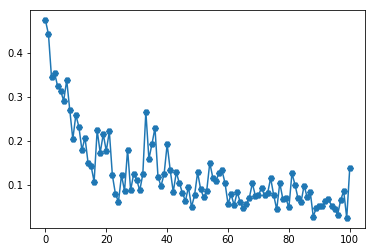

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(epoch_values, error_values, '-H')